In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import Word
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# ios:description

In [2]:
df1=pd.read_csv('appleStore_description.csv')
df1.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [3]:
# remove non-English words
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128) 
df1['app_desc'] = df1['app_desc'].apply(remove_non_ascii)

In [4]:
# lemma还原时态
df1['app_desc'] = df1['app_desc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

(-0.5, 1999.5, 999.5, -0.5)

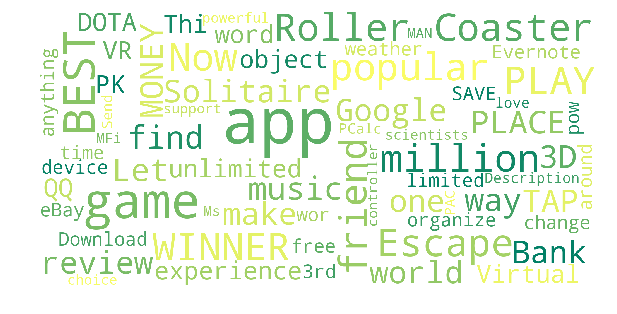

In [5]:
# wordcloud 去除stopwords
# https://matplotlib.org/examples/color/colormaps_reference.html
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 2000, height = 1000,
                colormap="summer", background_color ='white',
                stopwords = stopwords,
                max_words=200,
                max_font_size=225, 
                random_state=50,
                min_font_size=50).generate(str(df1['app_desc']))

# plot the WordCloud image                       
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

# android: user review

In [6]:
df2=pd.read_csv('googleplaystore_user_reviews.csv')
df2=df2.dropna()
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [7]:
# lower
df2['Translated_Review'] = df2['Translated_Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))  

In [8]:
positive = df2[df2['Sentiment']=='Positive']
negative = df2[df2['Sentiment']=='Negative']

In [9]:
pos=positive.groupby('App')['Translated_Review'].apply(' '.join).reset_index()
positive_sentence_list = pos['Translated_Review'].dropna()
neg=negative.groupby('App')['Translated_Review'].apply(' '.join).reset_index()
negative_sentence_list = neg['Translated_Review'].dropna()

In [10]:
# lemma还原时态
pos['Translated_Review'] = pos['Translated_Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
neg['Translated_Review'] = neg['Translated_Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

(-0.5, 1499.5, 1999.5, -0.5)

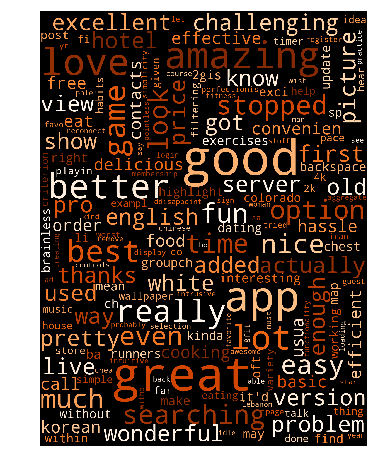

In [12]:
# positive
# wordcloud 去除stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1500, height = 2000,
                colormap="Oranges", background_color ='black',
                stopwords = stopwords,
                max_words=200,
                max_font_size=225, 
                random_state=50,
                min_font_size = 30).generate(str(pos['Translated_Review']))

# plot the WordCloud image                       
plt.figure(figsize = (10,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1499.5, 1999.5, -0.5)

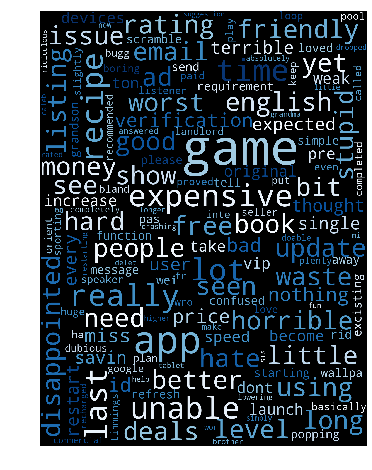

In [13]:
# negative
# wordcloud 去除stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1500, height = 2000, 
                colormap="Blues", background_color ='black',
                stopwords = stopwords,
                max_words=200,
                max_font_size=225, 
                random_state=50,
                min_font_size = 30).generate(str(neg['Translated_Review']))

# plot the WordCloud image                       
plt.figure(figsize = (10,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")